**TEST N°1: MACHINE LEARNING E INTELIGENCIA ARTIFICIAL**


Nombres: Diego Yañez, Matias Diaz, Ignacio Pincheira y Cristhian Fernandez.

Fecha: 08-mayo-2023

# Carga de datos


In [ ]:
# Se cargan los datos desde Google Drive y se les asigna el nombre df
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import pandas as pd
import numpy as np

filename = "/content/gdrive/MyDrive/data/Iris.csv"
df = pd.read_csv(filename)
print(df)

Mounted at /content/gdrive
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  


# Librerias

In [ ]:
#Se importan las distintas librerias que se utilizaran a lo largo del test
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



# Entendimiento de los datos

In [ ]:
#Se elimina la variable Id
df.drop('Id',axis=1,inplace=True)

In [ ]:
#Ver instancias del dataset
df.head(50)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Dimensiones del dataset
df.shape

(150, 5)

In [ ]:
#Tipos de datos
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#Resumen de los datos
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Se ven los datos nulos del dataset
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#Distribucion de clases del dataset
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<ipython-input-115-03effe160e8b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


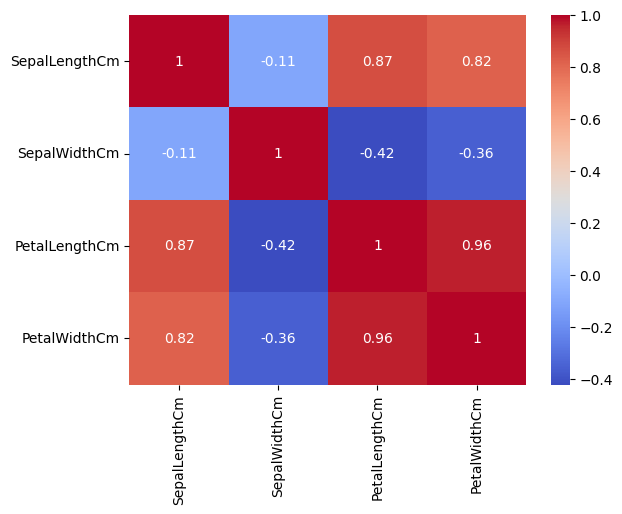

In [ ]:
#Se calcula la correlacion del dataset
plt.figure()
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

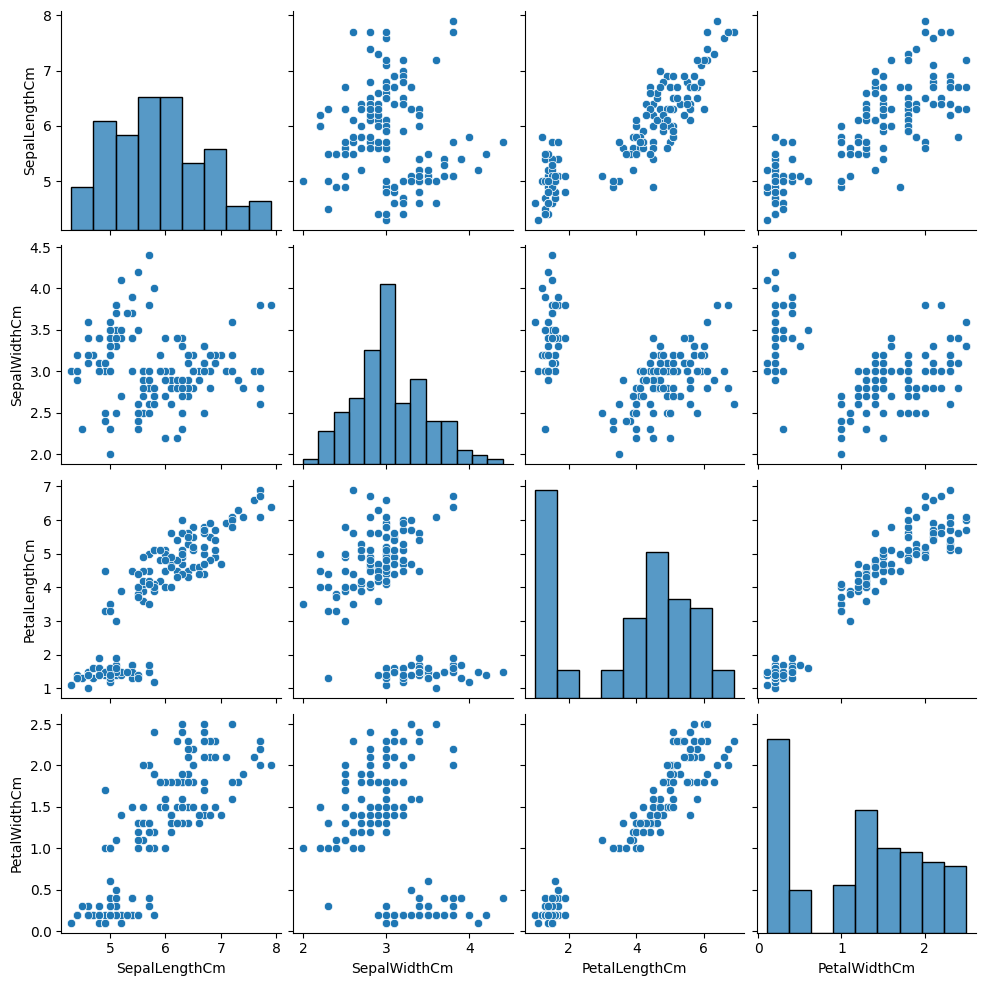

In [ ]:
sns.pairplot(df)

In [ ]:
#Se analiza la asimetria de los datos
df.skew()

<ipython-input-117-dc7feb122138>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

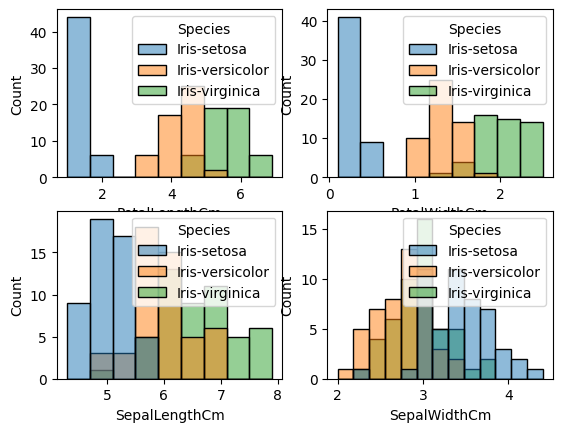

In [ ]:
#Histogramas
plt.subplot(2,2,1)
sns.histplot(data=df, x="PetalLengthCm", hue="Species")

plt.subplot(2,2,2)
sns.histplot(data=df, x="PetalWidthCm", hue="Species")

plt.subplot(2,2,3)
sns.histplot(data=df, x="SepalLengthCm", hue="Species")

plt.subplot(2,2,4)
sns.histplot(data=df, x="SepalWidthCm", hue="Species")

<ipython-input-119-6f94bdbe9d92>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SepalLengthCm'], shade=True, label='SepalLengthCm')
<ipython-input-119-6f94bdbe9d92>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SepalWidthCm'], shade=True, label='SepalWidthCm')
<ipython-input-119-6f94bdbe9d92>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['PetalLengthCm'], shade=True, label='PetalLengthCm')
<ipython-input-119-6f94bdbe9d92>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['PetalW

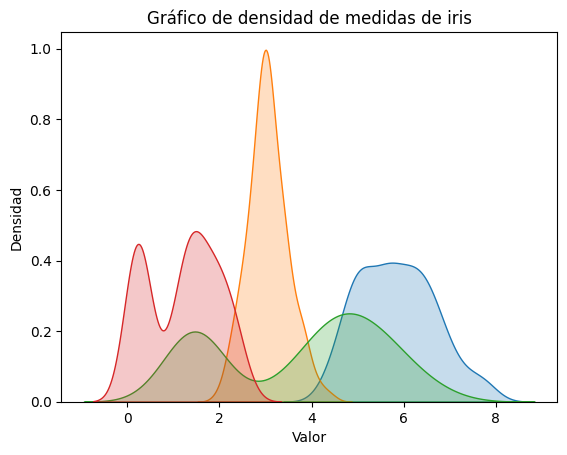

In [ ]:
#Densidad (se usa la funcion plot con el parametro kind = "density")

sns.kdeplot(df['SepalLengthCm'], shade=True, label='SepalLengthCm')
sns.kdeplot(df['SepalWidthCm'], shade=True, label='SepalWidthCm')
sns.kdeplot(df['PetalLengthCm'], shade=True, label='PetalLengthCm')
sns.kdeplot(df['PetalWidthCm'], shade=True, label='PetalWidthCm')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad de medidas de iris')

plt.show()


<Axes: >

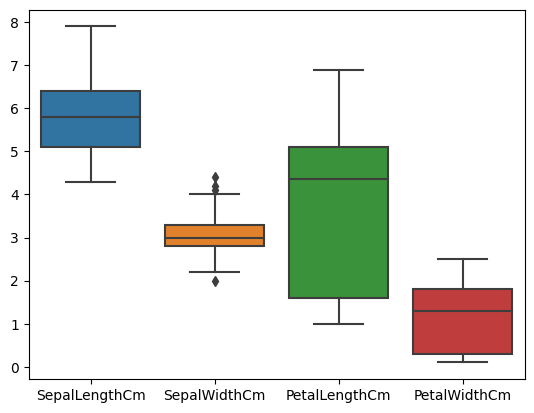

In [ ]:
#Boxplot para ver outliers del dataset
sns.boxplot(data=df)

In [ ]:
#Imputamos por la media los valores que se encuentran fuera del rango.
m = np.mean(df.SepalWidthCm)
m
out = []
sd = np.std(df.SepalWidthCm)
for i in df.SepalWidthCm:
    z = (i-m)/sd
    if np.abs(z) > 3:
        out.append(i)
print("Outliers:",out)

Outliers: [4.4]


In [ ]:
#Estandarizamos utilizando la distribucion normal, esto debido a que los datos presentan un comportamiento similar a la distribucion mencionada. Esto facilita el aprendizaje de nuestro modelo.
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean) / std
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = standardized_data
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [ ]:
#Transformamos la columna de Species de variables categoricas a numericas, esto para facilitar la aplicacion de una regresion logistica.
df1=df
df1['Species'] = df1['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
print(df1.head())
df1['Species'] = df1['Species'].astype('category')

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      -0.900681      1.032057      -1.341272     -1.312977        1
1      -1.143017     -0.124958      -1.341272     -1.312977        1
2      -1.385353      0.337848      -1.398138     -1.312977        1
3      -1.506521      0.106445      -1.284407     -1.312977        1
4      -1.021849      1.263460      -1.341272     -1.312977        1


# Procesamiento de datos

In [ ]:
#Informacion basica
print("Cantidad de filas y columnas", df.shape)
print("Nombre de columnas", df.columns)

Cantidad de filas y columnas (150, 5)
Nombre de columnas Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
#Dividir datos mediante split donde el 80% de los datos quedan para entrenamiento y el 20% para testeo.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df1['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:")
print(X_train)
print(y_train)

print("\n")

print("Datos de prueba:")
print(X_test)
print(y_test)

Datos de entrenamiento:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22       -1.506521      1.263460      -1.568735     -1.312977
15       -0.173674      3.114684      -1.284407     -1.050031
65        1.038005      0.106445       0.364699      0.264699
11       -1.264185      0.800654      -1.227541     -1.312977
42       -1.748856      0.337848      -1.398138     -1.312977
..             ...           ...            ...           ...
71        0.310998     -0.587764       0.137236      0.133226
106      -1.143017     -1.281972       0.421564      0.659118
14       -0.052506      2.189072      -1.455004     -1.312977
92       -0.052506     -1.050569       0.137236      0.001753
102       1.522676     -0.124958       1.217684      1.185010

[120 rows x 4 columns]
22     1
15     1
65     2
11     1
42     1
      ..
71     2
106    3
14     1
92     2
102    3
Name: Species, Length: 120, dtype: category
Categories (3, int64): [1, 2, 3]


Datos de prueba:
     SepalLen

# Regresion

**Regresion Logistica**

In [ ]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Coeficiente de regresión
coeficientes = model.coef_

# Predecir los valores del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el R2 Score
r2 = r2_score(y_test, y_pred)

# Validación cruzada para el modelo
scores = cross_val_score(model, X, y, cv=5)

print(f'Coeficiente de regresión: {coeficientes}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')
print(f'Validación cruzada: {scores.mean()}')


Coeficiente de regresión: [[-1.0205419   1.12728796 -1.81774653 -1.69881636]
 [ 0.53378785 -0.28100139 -0.34450472 -0.72279041]
 [ 0.48675406 -0.84628656  2.16225125  2.42160678]]
MSE: 0.0
R2 Score: 1.0
Validación cruzada: 0.9600000000000002


# Comparativa de predicciones versus valores reales

In [ ]:


# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir las primeras 100 predicciones y los valores reales correspondientes
print("Predicciones del modelo:")
print(y_pred[:100])
print("Valores reales:")
print(y_test[:100])

# Calcular el informe de clasificación
print(classification_report(y_test, y_pred))


Predicciones del modelo:
[2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1]
Valores reales:
73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
110    3
12     1
36     1
9      1
19     1
56     2
104    3
69     2
55     2
132    3
29     1
127    3
26     1
128    3
131    3
145    3
108    3
143    3
45     1
30     1
Name: Species, dtype: category
Categories (3, int64): [1, 2, 3]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

